In [1]:
from __future__ import absolute_import, division,print_function,unicode_literals
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#load the dataset
fashion_mnist =keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
#look at the dataset [output are 10 classification]
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [23]:
#shapes of images and labels

print(train_images.shape)
print(train_labels.shape)

#divide the train and test to scale values from 0 to 1
train_images=train_images/255.0
test_images=test_images/255.0

(60000, 28, 28)
(60000,)


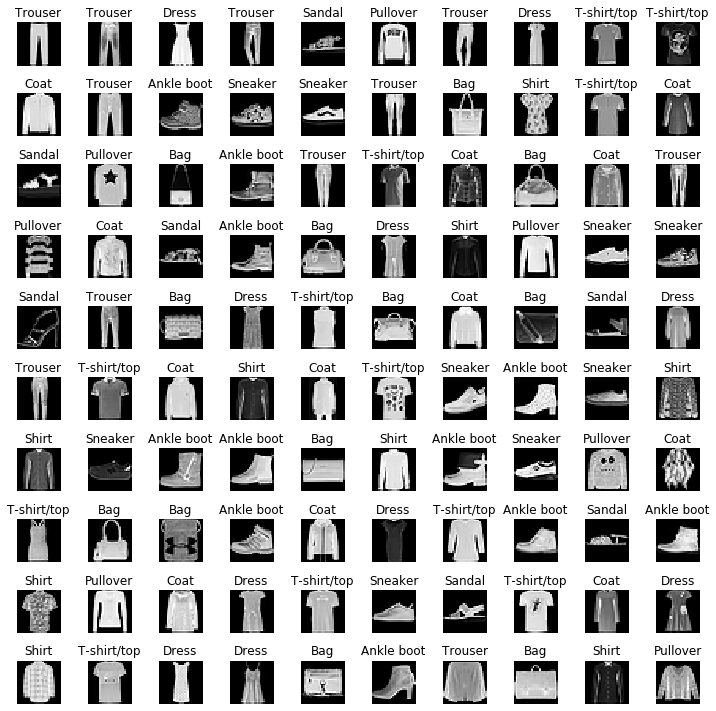

In [26]:
#preproces the data 
fig,ax=plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        t=np.random.randint(train_images.shape[0])
        ax[i][j].imshow(train_images[t],cmap='gray')
        ax[i][j].axis('off')
        ax[i][j].set_title(class_names[train_labels[t]])
fig.tight_layout()

In [28]:
#build the model now 
'''Most of deep learning consists of chaining together simple layers. 
Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.'''

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


In [ ]:
'''The first layer in this network, tf.keras.layers.Flatten, transforms the format of the 
images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). 
Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; 
it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers.
These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons).
The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. 
Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.'''

In [ ]:
#comple the model
'''Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" 
the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, 
the fraction of the images that are correctly classified.'''

In [30]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [31]:
#train the model

'''Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
The model learns to associate images and labels.
We ask the model to make predictions about a test set—in this example, the test_images array.
We verify that the predictions match the labels from the test_labels array.'''

model.fit(train_images,train_labels,epochs=10)

W0803 13:49:04.769760 23392 deprecation.py:323] From c:\users\nitin mali\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 341us/sample - loss: 0.5013 - accuracy: 0.8221
Epoch 2/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3726 - accuracy: 0.8652
Epoch 3/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3376 - accuracy: 0.8765
Epoch 4/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3141 - accuracy: 0.8846
Epoch 5/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2958 - accuracy: 0.8919
Epoch 6/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2815 - accuracy: 0.8966
Epoch 7/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2682 - accuracy: 0.9016
Epoch 8/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2559 - accuracy: 0.9040
Epoch 9/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2458 - accuracy: 0.9079
Epoc

In [32]:
#model accuracy on test set

test_loss,test_acc =model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 146us/sample - loss: 0.3315 - accuracy: 0.8841 - loss: 0.3331 - accuracy


In [ ]:
'''It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. 
This gap between training accuracy and test accuracy represents overfitting. 
Overfitting is when a machine learning model performs worse on new, 
previously unseen inputs than on the training data.'''



In [33]:
#Make predictions 
predictions =model.predict(test_images)

In [34]:
'''A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each 
of the 10 different articles of clothing. We can see which label has the highest confidence value:'''

array([2.4820105e-07, 4.1919492e-08, 1.5324838e-06, 1.1856405e-09,
       1.0469175e-08, 2.8089844e-04, 4.5004137e-07, 5.0316402e-03,
       5.9274851e-07, 9.9468464e-01], dtype=float32)

In [50]:
def plot_image(i,predictions,test_labels,test_images):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i],cmap="gray")
    
    predicted_label=np.argmax(predictions[i])
    if predicted_label==test_labels[i]:
        color="blue"
    else:
        color="red"
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                                          100*np.max(predictions[i]),
                                          class_names[test_labels[i]]),
                                         color=color)
    

In [53]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

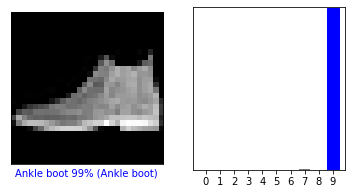

In [54]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

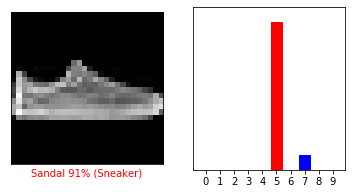

In [55]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

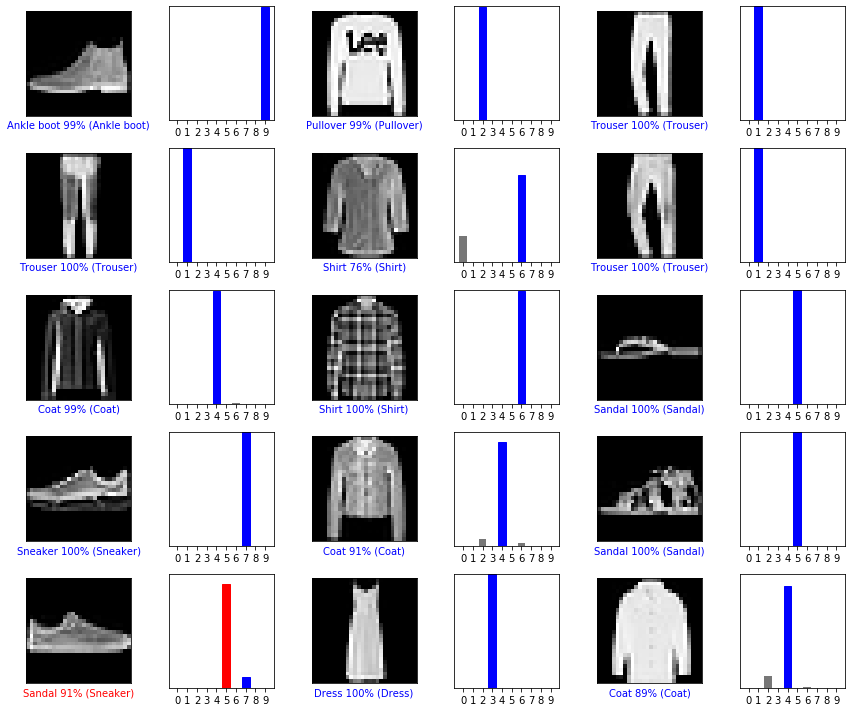

In [56]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()